In [241]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeClassifier

In [242]:
# Load Dataset 
df = sns.load_dataset("iris")

In [243]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [244]:
# Summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [245]:
# statistics 
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [246]:
# Null Check 
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# 1. Outlier Detection

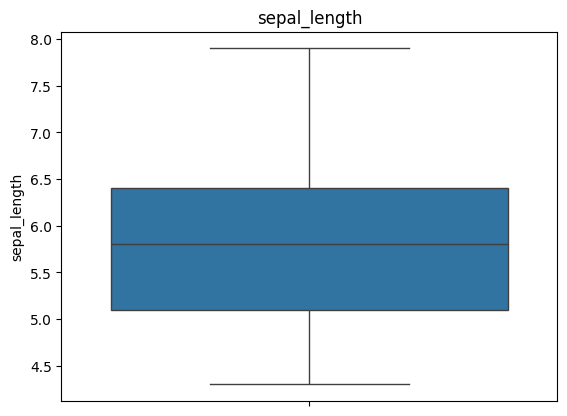

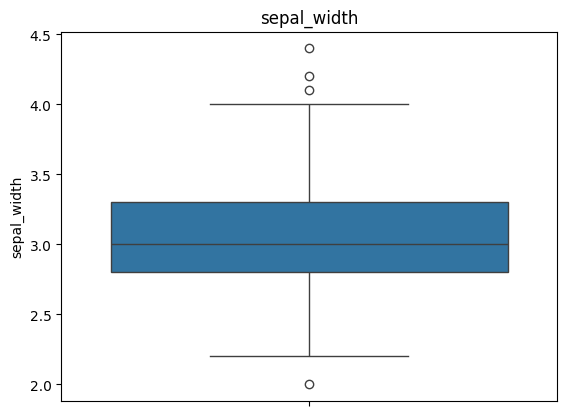

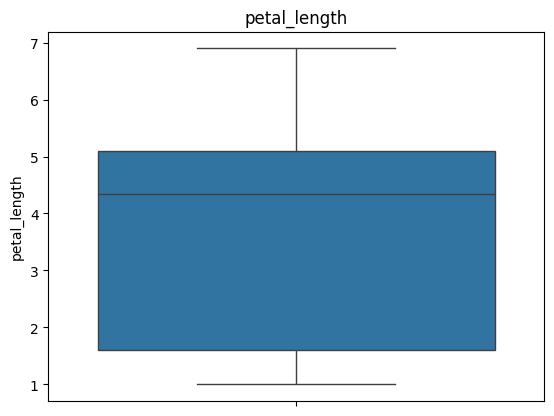

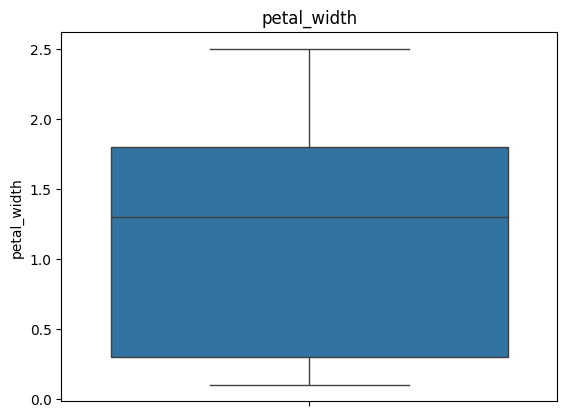

In [247]:
# Boxplot of Each Numeric Column in df 
numeric_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_numeric = df[numeric_columns]
for col in df_numeric:
    sns.boxplot(df_numeric[col])
    plt.title(col)
    plt.show()

- Here We Have Some Outliers in `sepal_width`

# 1.1 Outlier removal

In [248]:
import seaborn as sns
import pandas as pd


# Display the shape of the original dataset
print("Original dataset shape:", df.shape)

# Specify the columns you want to check for outliers
numeric_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and filter out the outliers
outliers_mask = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)
df_no_outliers1 = df[~outliers_mask]

# Display the shape of the dataset after removing outliers
print("Dataset shape after removing outliers:", df_no_outliers1.shape)


Original dataset shape: (150, 5)
Dataset shape after removing outliers: (146, 5)


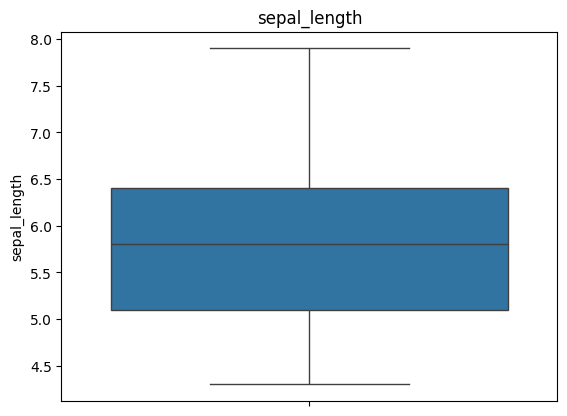

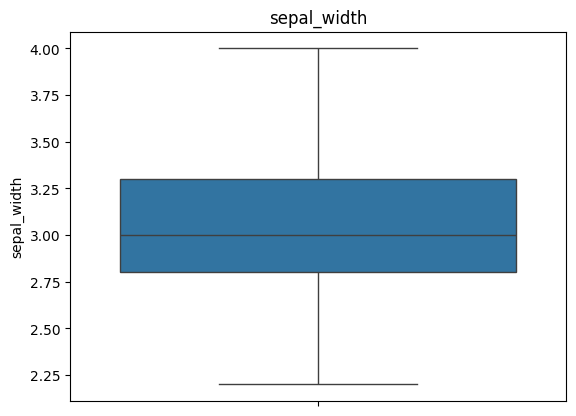

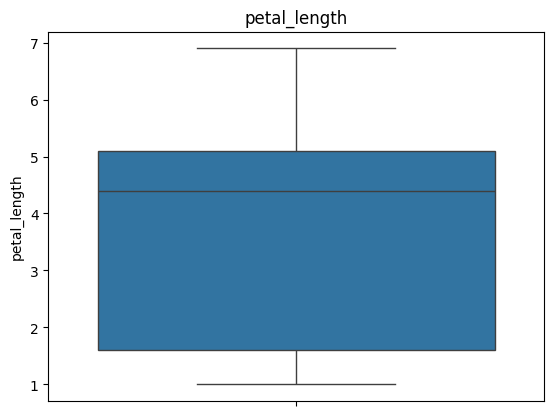

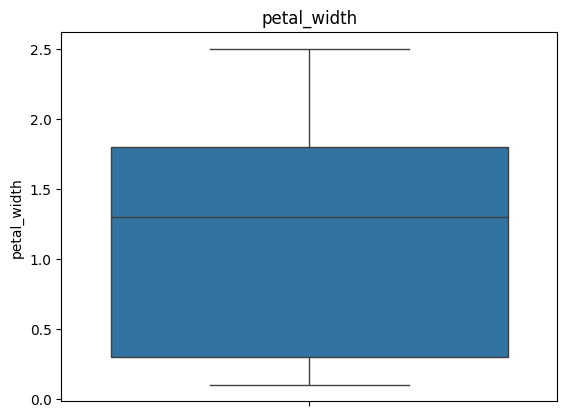

In [249]:
# Boxplot after outlier removal on All numeric COlumns
df_no_outliers1_numeric = df_no_outliers1[numeric_columns]
for col in df_no_outliers1_numeric:
    sns.boxplot(df_no_outliers1_numeric[col])
    plt.title(col)
    plt.show()

- Now There is no Outlier in This 

# 2 Now Check Data Distribution 

In [250]:
import scipy.stats as stats

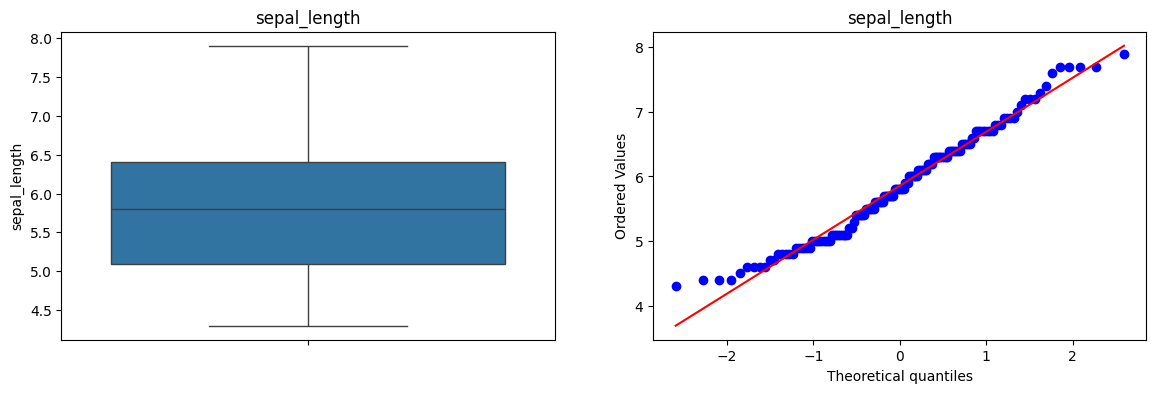

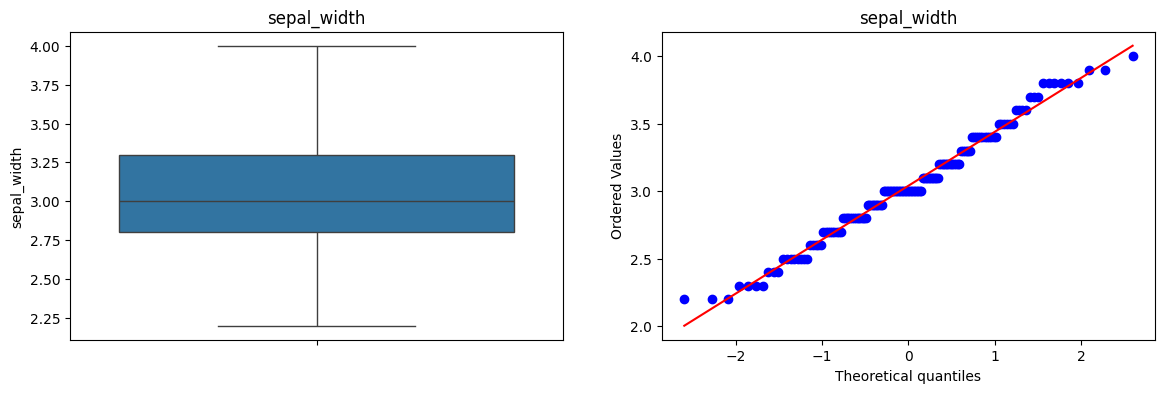

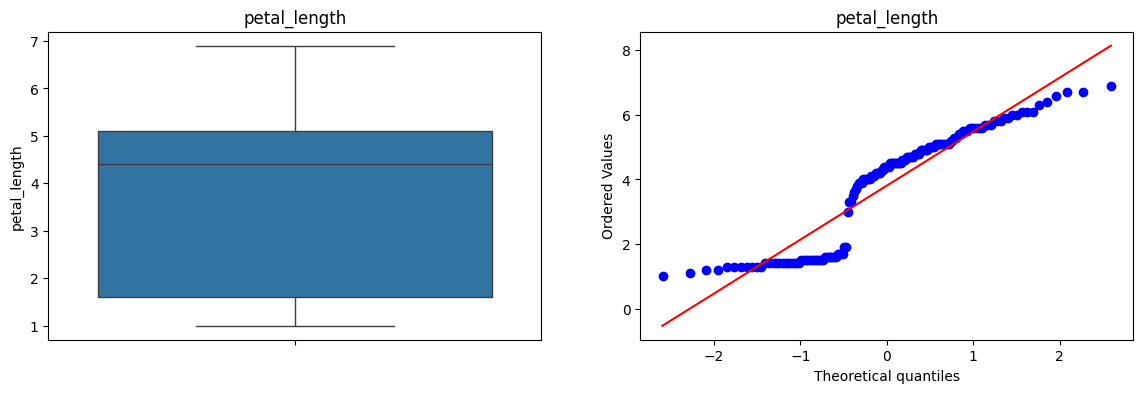

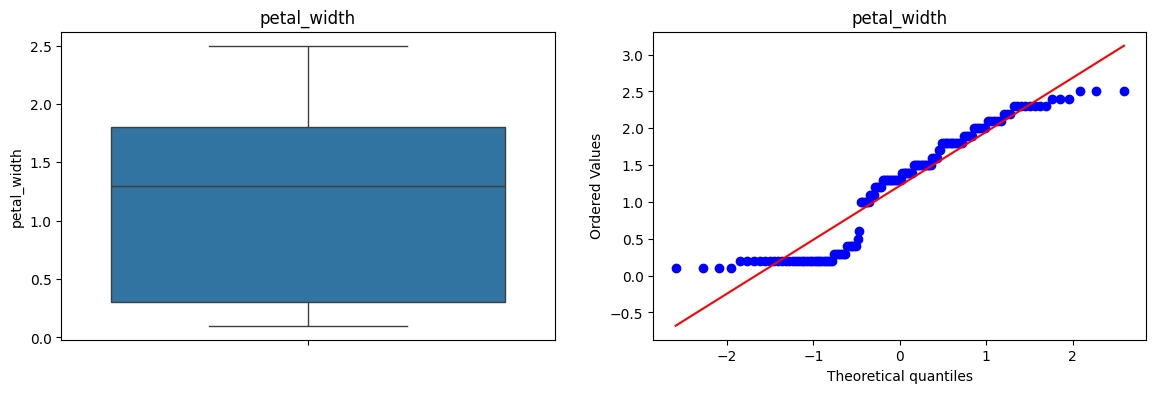

In [251]:
numeric_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# Plotting the distplots without any transformation

for col in df_no_outliers1_numeric:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.boxplot(df_no_outliers1_numeric[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df_no_outliers1_numeric[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

- Data is Nearly to Normal Distributed in `sepal_lenght` and `sepal_width` but not in `petal_lenght` and `petal_width`

## 2.1 Lets Split Data Into Train Test SPlit And Then Make a Pipe in which We Transform Numeric Columns Using Power Transformer and Encode Categorical Label 

In [252]:
df2 = df_no_outliers1.copy()

In [253]:
df2.shape

(146, 5)

- Applying Label Encoder on Over Dependent Variable 

In [254]:
lb = LabelEncoder()

df2['species'] = lb.fit_transform(df2['species'])

In [255]:
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [256]:
X = df2.drop(columns='species')
y = df2['species']

In [257]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [258]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
80,5.5,2.4,3.8,1.1
19,5.1,3.8,1.5,0.3
48,5.3,3.7,1.5,0.2
53,5.5,2.3,4.0,1.3
47,4.6,3.2,1.4,0.2
...,...,...,...,...
9,4.9,3.1,1.5,0.1
107,7.3,2.9,6.3,1.8
71,6.1,2.8,4.0,1.3
121,5.6,2.8,4.9,2.0


In [259]:
y_train

80     1
19     0
48     0
53     1
47     0
      ..
9      0
107    2
71     1
121    2
50     1
Name: species, Length: 116, dtype: int32

# 2.2 Now Apply Column Transformer 

- Power Transformer 

In [260]:
trf1 = ColumnTransformer([
    ('power', PowerTransformer(), ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
])

- Model 

In [261]:
trf2 = DecisionTreeClassifier()

- Creating Pipeline

In [262]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])

In [263]:
# train
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(transformers=[('power', PowerTransformer(),
                                                  ['sepal_length',
                                                   'sepal_width',
                                                   'petal_length',
                                                   'petal_width'])])),
                ('trf2', DecisionTreeClassifier())])

In [264]:
# Predict
y_pred = pipe.predict(X_test)
y_pred

array([0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1, 0,
       2, 1, 2, 0, 2, 1, 1, 2])

In [265]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9666666666666667

In [266]:
# Compare Actudal and Predicted Values
print(pd.DataFrame({'Actual':y_test,'Predicted':y_pred}))

     Actual  Predicted
7         0          0
25        0          0
28        0          0
123       2          2
146       2          2
54        1          1
46        0          0
23        0          0
116       2          2
27        0          0
43        0          0
82        1          1
134       2          2
66        1          1
75        1          1
95        1          1
17        0          0
57        1          2
102       2          2
8         0          0
93        1          1
40        0          0
120       2          2
88        1          1
148       2          2
36        0          0
147       2          2
94        1          1
87        1          1
109       2          2


- Cross_Validation Check 


In [267]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.9485507246376811

---
---
---

In [268]:
df3 = df_no_outliers1.copy()
df3

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [269]:
df3_num = df3[numeric_columns]
df3_num

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [270]:
pt = PowerTransformer()
df3_num_transformed = pt.fit_transform(df3_num)

In [271]:
# convert it Back into Dataframe 
df3_num_transformed_df = pd.DataFrame(df3_num_transformed, columns=df3_num.columns)
df3_num_transformed_df

,sepal_length,sepal_width,petal_length,petal_width
0,-0.905819,1.151059,-1.356804,-1.356182
1,-1.188197,-0.075113,-1.356804,-1.356182
2,-1.482122,0.424940,-1.407456,-1.356182
3,-1.633694,0.176591,-1.305747,-1.356182
4,-1.045617,1.387152,-1.356804,-1.356182
...,...,...,...,...
141,1.020137,-0.075113,0.792330,1.411985
142,0.586237,-1.388847,0.670749,0.897720
143,0.806607,-0.075113,0.792330,1.026721
144,0.473359,0.912062,0.914664,1.411985


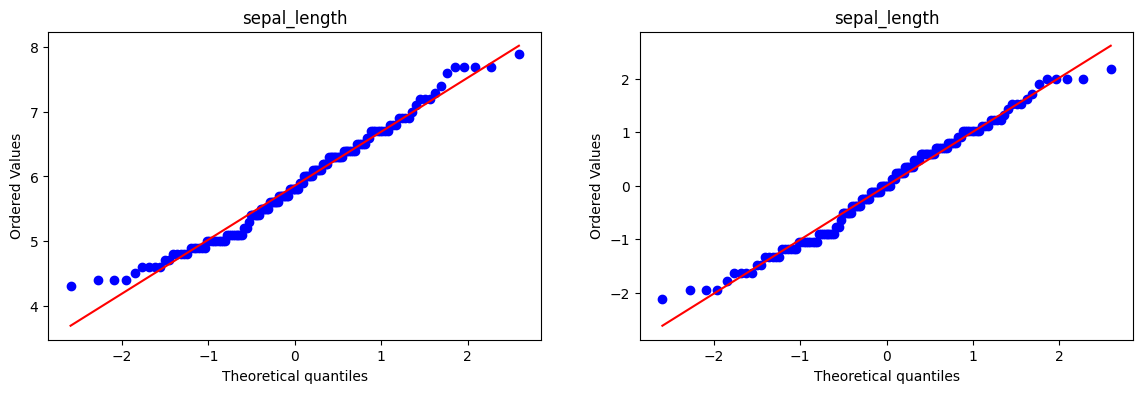

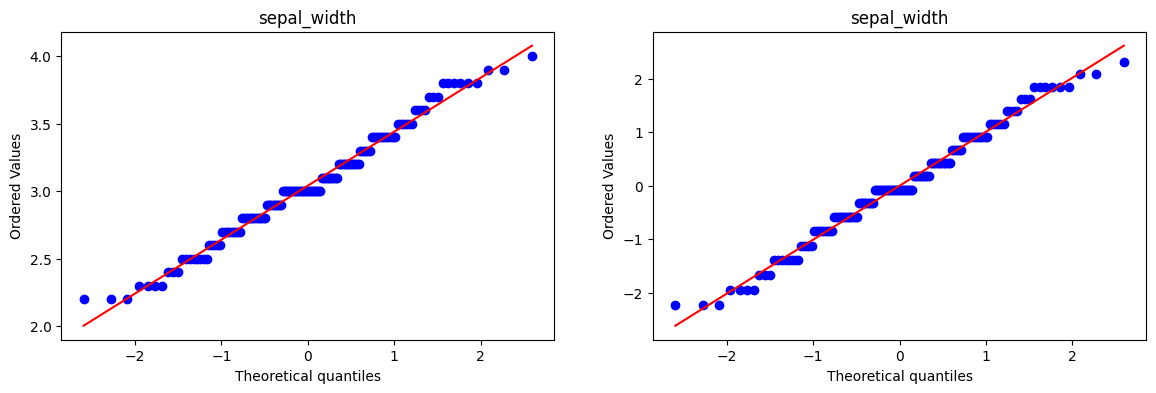

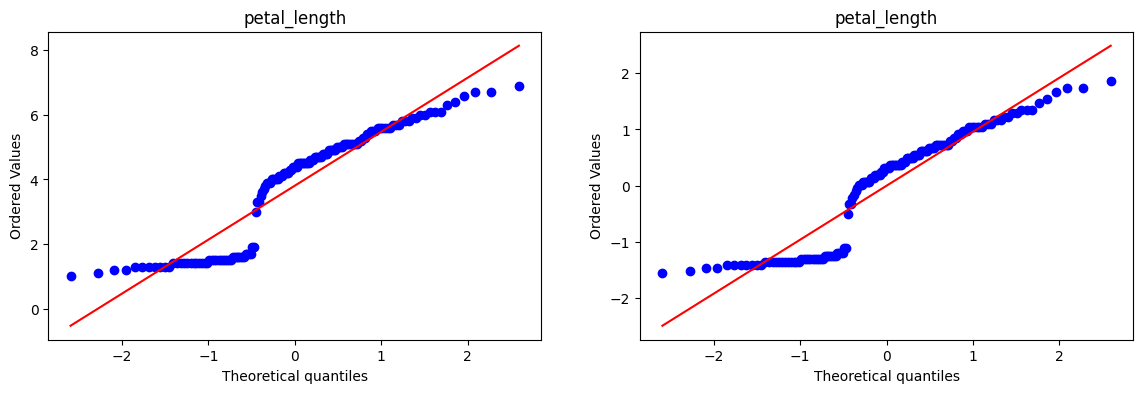

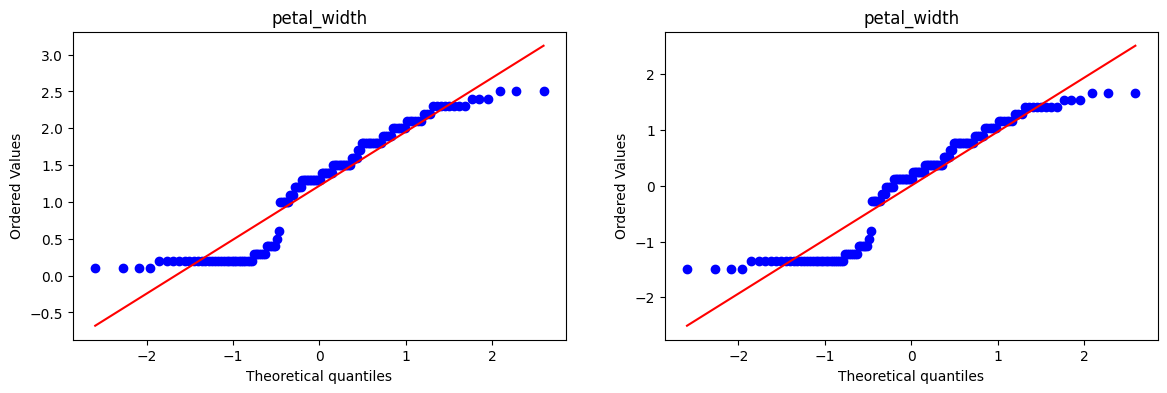

In [272]:

# Plotting the distplots with transformation

for col in df3_num_transformed_df:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(df_no_outliers1_numeric[col], dist="norm", plot=plt)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df3_num_transformed_df[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()